# Support Vector Machines
- Pick the best hyperplane to separate classes
- Generalization to sets of hyperplanes
- Also kernel variants - more on this later

## Hard margin: linearly separable classes
- Maximize distance to either classes

**Distance of hyperplanes**
-  Pick a point $x_0$ on hyperplane $w^T x - b = -1$ 
- Shift it along $w$ by unknown distance $d$ to be on $w^T x - b = 1$  
- Express $d$ from the equations: $\displaystyle d = \frac{2}{|\!| w |\!|}$

### Optimization problem
- Maximize the gap such that all points are on the "correct side".
- Using coordinate geometry, the gap is calculated to be $2|\!| w |\!|^{-1}$, so we can solve
    - $\quad \min |\!| w |\!|_2^2 $ s.t.
    - $\quad w^T x_i - b \ge \ 1 \ \quad \forall i: y_i=1$ 
    - $\quad w^T x_i - b \le -1 \quad \forall i: y_i=-1$
- Alternatively, Because $y_i$ only take values -1 or 1, the constraints simplify
    - $\quad\min |\!| w |\!|_2^2 $ s.t. $\quad(w^T x_i - b)\cdot{}y_i \ge 1 \quad \forall i$ 

## Support Vectors
The final fit depends on the closes points in each class. These are the support vectors.

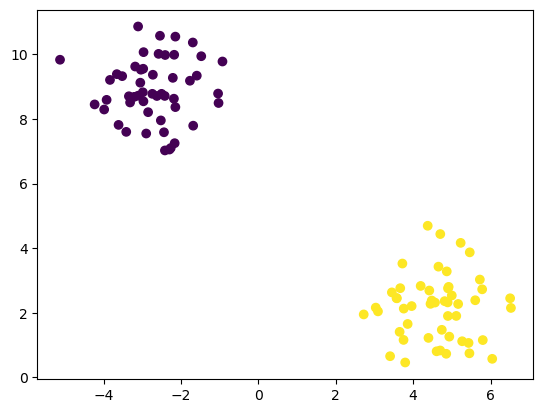

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, c = datasets.make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=c);

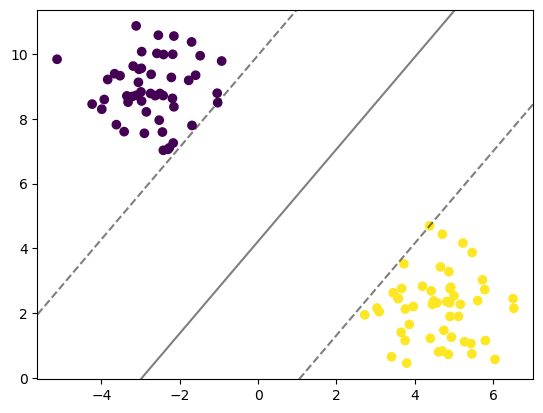

In [2]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, c)

# Create grid to evaluate model
x = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
y = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)

YY, XX = np.meshgrid(y, x)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=c);

## Iris Example

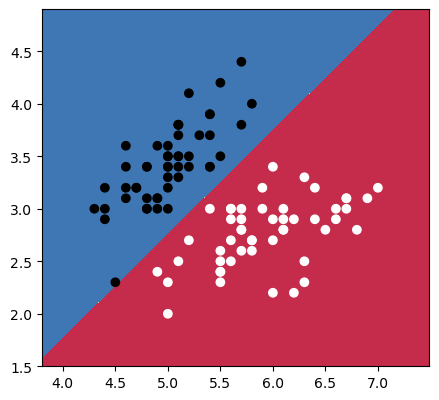

In [4]:
from sklearn.svm import SVC
iris = datasets.load_iris()

X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))


clf = SVC(kernel='linear')
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

## Soft margin: classes are not separable
- SVM is extended to tolerate but minimize interlopers.
- $\displaystyle \quad(\hat{w}, \hat{b}) = \textrm{argmin} \big[ |\!| w |\!|_2^2 + C \sum_i \max\big\{0, 1-(w^T x_i\!-\!b)\cdot{}y_i) \big\} \big]$ where $C$ is a new parameter: the importance of (avoiding) interloppers.

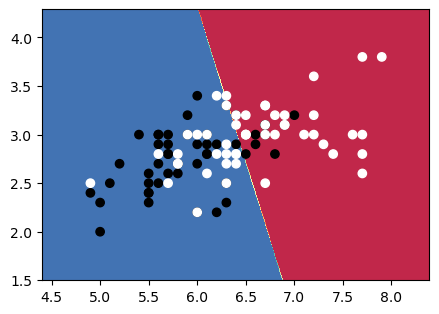

In [6]:
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c>0 # classes 1 and 2
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

# 2D model with x and y coordinates
clf = SVC(kernel='linear', C=0.01)
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

## Kernel methods
 - Data transformation $x$ to $\phi(x)$ 
 - Use the same methods as before on transformed data

### Kernel trick
- Similarity of $x$ and $x'$ in general
- Inner product $ \displaystyle k(x,x') = \phi(x) \cdot \phi(x')$

### Kernel functions
- We don't even need to think about $\phi(\cdot)$
- Different kernel functions, e.g.,
    - Polynomial $\ \ \ \ \ \ \displaystyle k(x,y) = ( x^T y + c)^d$
    - RBF (radial basis function): $\ \ \ \ \ \ \displaystyle k(x,y) = \exp\left\{-\frac{(x-y)^2}{2\sigma^2}\right\}$

### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 


- **Exercise!** Run the script for the classifiers we discussed to compare the results

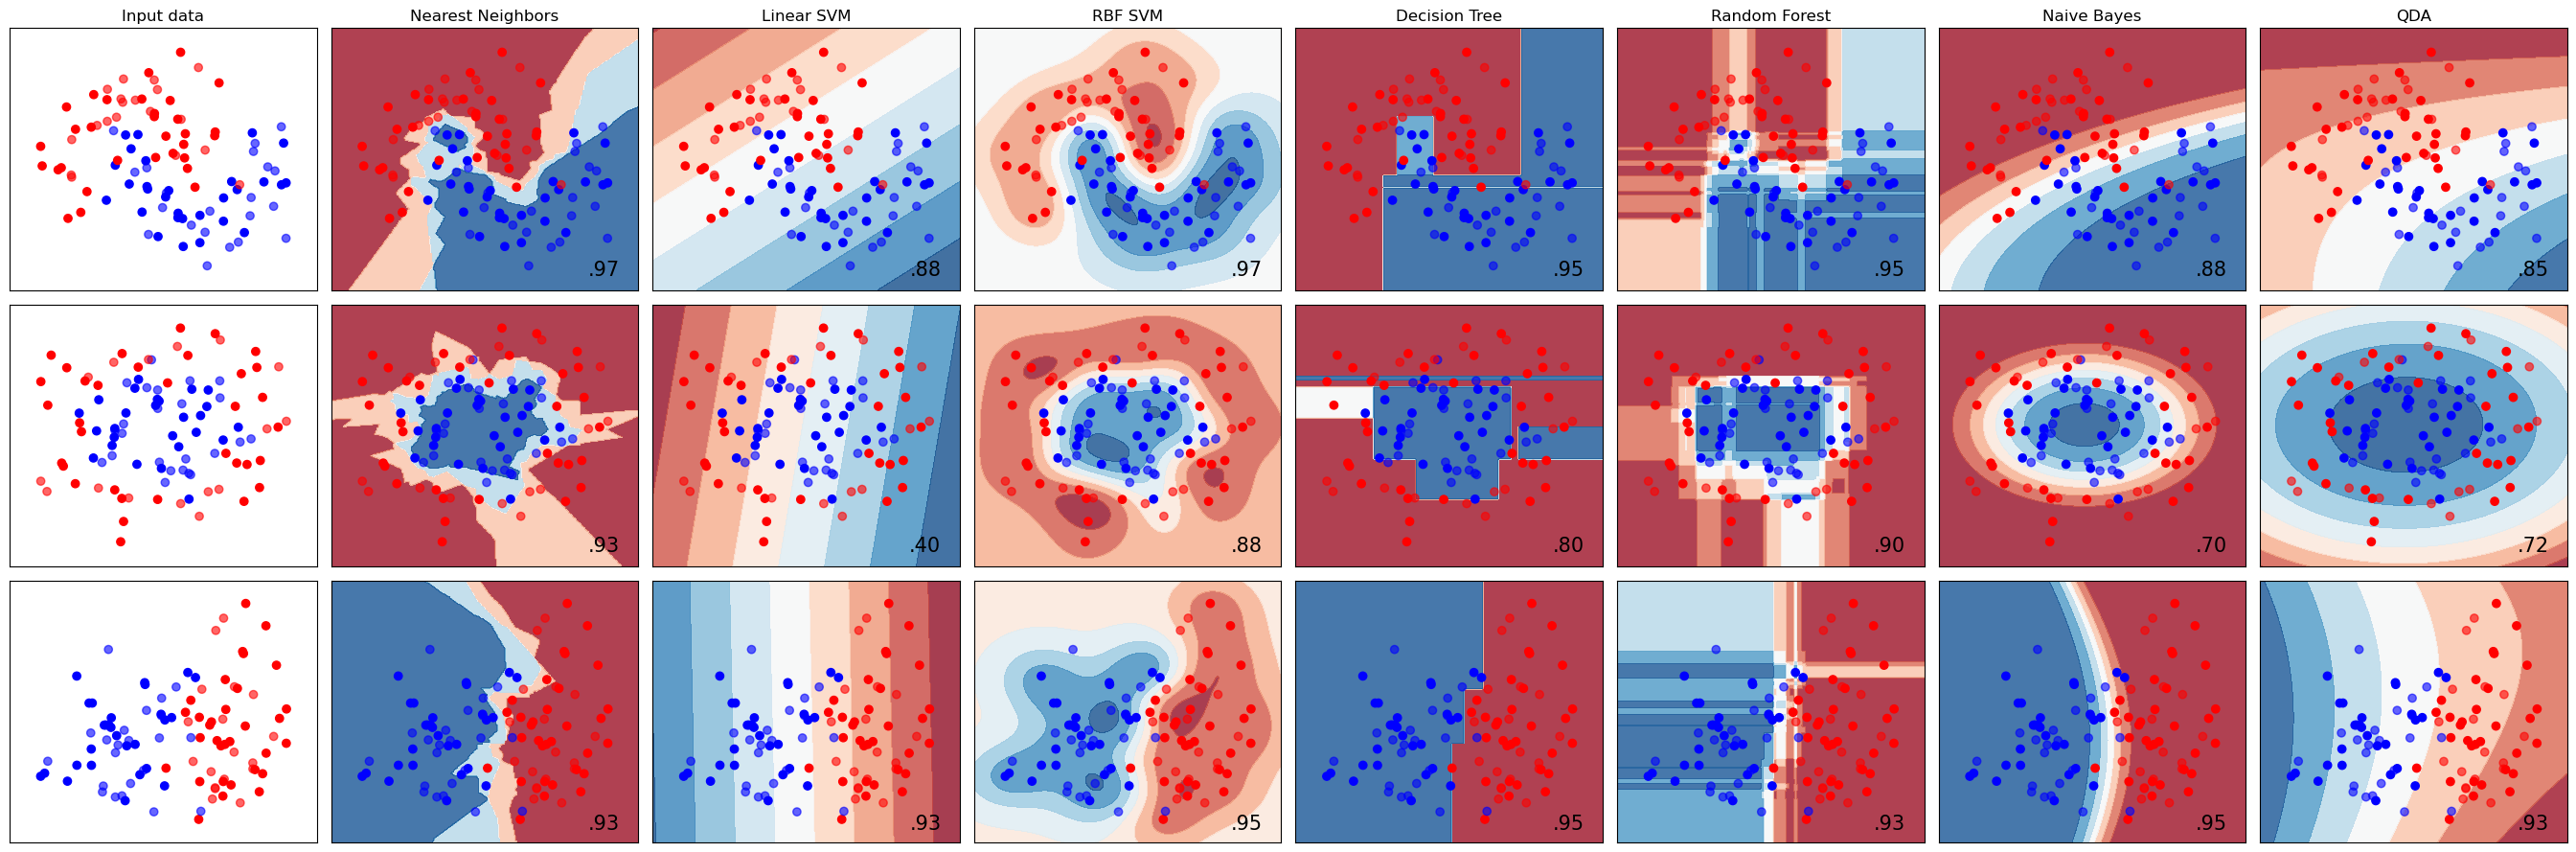

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", #"Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()